# k-Nearest Neighbors

#### Loading data and related libraries

In [3]:
import pandas as pd
from plotnine import *
from sklearn.model_selection import train_test_split

iris = pd.read_csv("iris.csv")
iris.groupby('species').nunique()

,sepal_length,sepal_width,petal_length,petal_width,species
species,,,,,
setosa,15,16,9,6,1
versicolor,21,14,19,9,1
virginica,21,13,20,12,1


#### Let's look at how the species are distributed against petal width and length

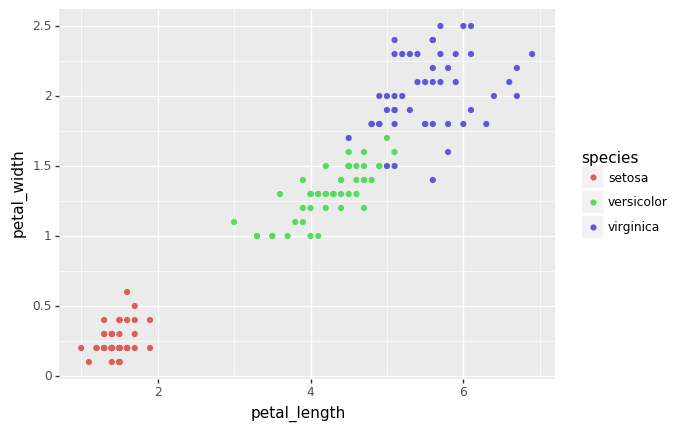

<ggplot: (294137469)>

In [4]:
ggplot(iris,aes(x="petal_length",y="petal_width",color="species"))+geom_point()

#### We see a clear distinction between setosa and the others so it would be interesting to see how good the accuracy will be if a data point to be tested is in the top right region

#### Let's separate out the petal length and width for our model

In [5]:
x = iris[['petal_length','petal_width']]
y = iris['species']

#### We use a built-in library for the model. We call this model a classifier as it is being used to classify a label.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

neigh=KNeighborsClassifier(n_neighbors=1) # initialize kNN classifier with k = 1

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # split data into training and testing sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
neigh.fit(X_train,y_train)

(120, 2) (120,)
(30, 2) (30,)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [8]:
print("predicted:",neigh.predict(X_test)) # what the classifier predicts
print("neighbors",neigh.kneighbors(X_test)) # for each test data point, what were the closest 1 neighbors

predicted: ['virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'versicolor' 'virginica' 'virginica' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor']
neighbors (array([[0.14142136],
       [0.        ],
       [0.        ],
       [0.31622777],
       [0.1       ],
       [0.1       ],
       [0.1       ],
       [0.14142136],
       [0.14142136],
       [0.2       ],
       [0.1       ],
       [0.1       ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.14142136],
       [0.1       ],
       [0.        ],
       [0.1       ],
       [0.        ],
       [0.14142136],
       [0.        ],
       [0.1       ],
       [0.1       ],
       [0.        ],
       [0.1       ],
       [0

#### We need to check accuracy of the classifier

In [9]:
from sklearn.metrics import accuracy_score
predictions = neigh.predict(X_test)
accuracy_score(y_test,predictions)

0.9666666666666667

#### So a very good accuracy but not 100%

#### Let's try to see what happens to the accuracy score as we keep incrementing the value of k

In [10]:
accuracy = []
k = []
for i in range(1,30):
    neigh=KNeighborsClassifier(n_neighbors=i)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    neigh.fit(X_train,y_train)
    predictions = neigh.predict(X_test)
    k.append(i)
    accuracy.append(accuracy_score(y_test,predictions))

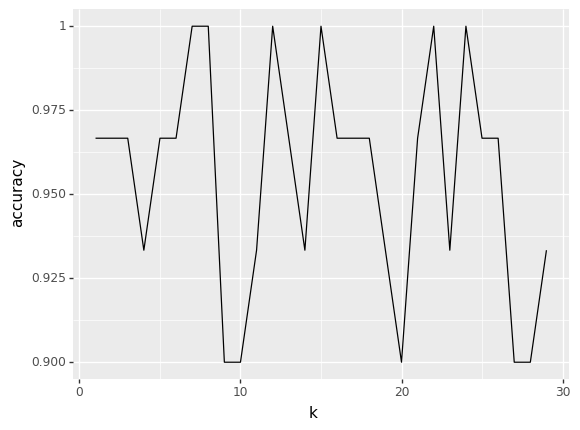

<ggplot: (296369481)>

In [11]:
df = pd.DataFrame({'k':k,'accuracy':accuracy})
ggplot(df,aes(x='k',y='accuracy'))+geom_line()